In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_json('../../data/query_join_v2/joinv2_queries_en_20221130140116.json', lines=True)

In [21]:
df = df.replace({float('nan'): None})

In [44]:
len(df)

2781512

In [37]:
df[['query']].sample(10)

,query
2413352,shitpost
1947504,bateria 23a 12v
765507,staplers
2404645,heeled boots men
350347,army pants for men
2274567,mexico case
941081,multi color flashlight
1936892,fire department badge
224007,jbox
512129,メモ用紙


In [39]:
df[df['query'].apply(len) == 0]

,query,avg_price,p25_price,p50_price,p75_price,true_tags,tag_weights,search_gmv,tot_buyers,tot_searches,...,frequency_group,total_product_gmv,brand_product_gmv,we_product_gmv,gmv_by_country,buyers_by_country,searches_by_country,searchers_by_country,new_categories,new_category_weights


<AxesSubplot: ylabel='Frequency'>

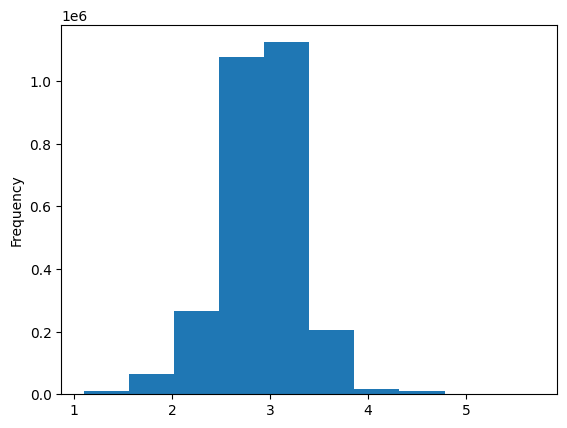

In [43]:
df['query'].apply(len).apply(lambda x: np.log(1 + x)).plot.hist()

<AxesSubplot: >

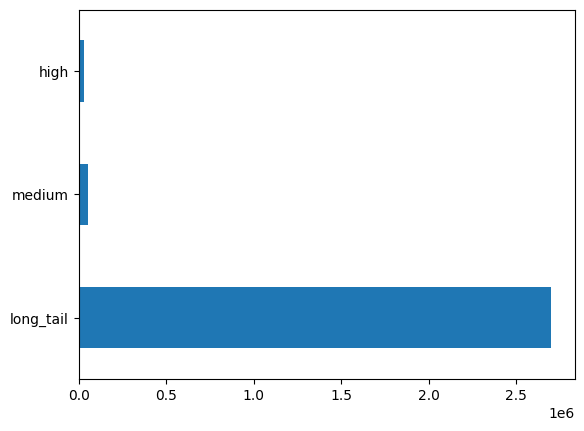

In [48]:
df['frequency_group'].value_counts().plot(kind='barh')

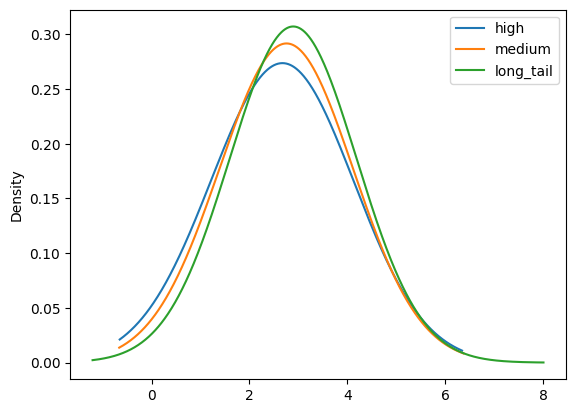

In [56]:
df[df.frequency_group == 'high']['query'].apply(len).apply(lambda x: np.log(1 + x)).plot.density(
    label='high', bw_method=3)
df[df.frequency_group == 'medium']['query'].apply(len).apply(lambda x: np.log(1 + x)).plot.density(
    label='medium', bw_method=3)
df[df.frequency_group == 'long_tail']['query'].apply(len).apply(lambda x: np.log(1 + x)).plot.density(
    label='long_tail', bw_method=3)
plt.legend()